# Churn Prediction For Telecom Customers

## Introduction

In the telecom sector, customers have the flexibility to select from various service providers, often switching between them. 
This results in a substantial annual churn rate of 15-25% in this fiercely competitive market. 
As retaining a customer costs is significantly less than acquiring a new one (five to ten times less) customer retention 
has become a priority over acquisition. 

For established telecom companies, the primary business objective is keeping their most profitable customers. 
To minimize churn, it is crucial for these companies to identify which customers are likely to leave.
In our project, we will analyze customer data from a leading telecom company, develop models to predict potential churn, 
and pinpoint the key predictors of churn.

Churn can be defined in several ways in the telecom industry:

 ***Revenue-based churn***: 
   Customers who have not engaged in any revenue-generating activities like using mobile internet, making outgoing calls, or sending SMS 
   over a certain period.

 ***Usage-based churn***: 
  Customers who have neither incoming nor outgoing usage—calls, internet, etc.—over a designated period. 
  A drawback of this approach is that identifying churn based on a prolonged period of inactivity, such as two months, 
  might be ineffective as the customer may have already switched providers by the time they are flagged.

In this project, we will adopt the usage-based method to identify churn based on the data collected from the telecom industry in Iran. We will delve into how predicting and managing churn can benefit telecom companies.
The dataset is randomly collected from an Iranian telecom company database over a period of 12 months. A total of 3150 rows and 13 columns of data, each row representing the customer information. The attributes that are in this dataset are called out below. All of the attributes except for attribute churn is the aggregated data of the first 9 months.The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.

### About the Dataset

**Call Failure**              ->           Number of call failures

**Complaints**                ->           Binary (0-> No complaint, 1-> Complaint)

**Subscription length**       ->           Total months of subscription

**Charge Amount**             ->           Ordinal attribute (0-> Lowest amount, 9-> Highest amount)

**Seconds of Use**            ->           Total seconds of call

**Frequency of Use**          ->           Total number of calls

**Frequency of SMS**          ->           Total number of text messages

**Distinct Called Numbers**   ->           Total number of distinct phone calls

**Age Group**                 ->           Ordinal attribute (1-> Younger, 5-> Older)

**Tariff Plan**               ->           Binary (1 -> Pay as you go, 2-> Contractual)

**Status**                    ->           Binary (1-> Active, 2-> Non-active)

**Age**                       ->           Age of the customer

**Customer value**            ->           The calculated value of the customer

**Churn**                     ->           Class label (1-> Churn, 0-> Non-churn)


#### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, roc_auc_score, auc

## Data Gathering

In [28]:
# Load the Customer churn dataset 
churn_data = pd.read_csv('USD_Project_Dataset/Customer Churn.csv')

# View the dataset
churn_data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


## Data Preparation & Cleaning

In [29]:
# Renaming the columns
churn_data=churn_data.rename(columns={"Call  Failure": "call_fail_", "Complains": "complaints_or_not_", "Subscription  Length": "subscription_length_", "Charge  Amount": "charge_amt_",
                   "Seconds of Use": "sec_of_use_", "Frequency of use": "freq_of_use_", "Frequency of SMS": "freq_of_sms_", "Distinct Called Numbers": "distinct_call_nos_",
                   "Age Group": "age_gp_", "Tariff Plan": "tariff_plan_", "Status": "status_", "Age": "age_", "Customer Value": "customer_value_", "Churn": "churn"})

In [30]:
# To check if there is any duplicates in the dataset
duplicates = churn_data.duplicated().sum()
print(duplicates)

print("The shape of the dataset before removing the duplicates", churn_data.shape)

# Remove the duplicates for building a better model
churn_data.drop_duplicates(inplace= True, ignore_index= True)
print("The shape of the dataset after removing the duplicates", churn_data.shape)

300
The shape of the dataset before removing the duplicates (3150, 14)
The shape of the dataset after removing the duplicates (2850, 14)


## EDA (Exploratory Data Analysis)

In [31]:
# Basic info about the dataset
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   call_fail_            2850 non-null   int64  
 1   complaints_or_not_    2850 non-null   int64  
 2   subscription_length_  2850 non-null   int64  
 3   charge_amt_           2850 non-null   int64  
 4   sec_of_use_           2850 non-null   int64  
 5   freq_of_use_          2850 non-null   int64  
 6   freq_of_sms_          2850 non-null   int64  
 7   distinct_call_nos_    2850 non-null   int64  
 8   age_gp_               2850 non-null   int64  
 9   tariff_plan_          2850 non-null   int64  
 10  status_               2850 non-null   int64  
 11  age_                  2850 non-null   int64  
 12  customer_value_       2850 non-null   float64
 13  churn                 2850 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 311.8 KB


In [32]:
# Check if there is any null values
churn_data.isnull().sum()

call_fail_              0
complaints_or_not_      0
subscription_length_    0
charge_amt_             0
sec_of_use_             0
freq_of_use_            0
freq_of_sms_            0
distinct_call_nos_      0
age_gp_                 0
tariff_plan_            0
status_                 0
age_                    0
customer_value_         0
churn                   0
dtype: int64

In [33]:
# Summary statistics
churn_data.describe()

,call_fail_,complaints_or_not_,subscription_length_,charge_amt_,sec_of_use_,freq_of_use_,freq_of_sms_,distinct_call_nos_,age_gp_,tariff_plan_,status_,age_,customer_value_,churn
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,7.802456,0.080702,32.452982,0.974737,4534.243158,70.484912,73.789825,23.870526,2.835088,1.080351,1.240000,31.077193,474.990367,0.156491
std,7.326172,0.272424,8.723075,1.550618,4199.712303,57.401512,112.062397,17.193929,0.893503,0.271883,0.427158,8.861934,514.442198,0.363384
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,29.000000,0.000000,1458.750000,28.000000,7.000000,11.000000,2.000000,1.000000,1.000000,25.000000,117.527500,0.000000
50%,6.000000,0.000000,35.000000,0.000000,3041.000000,54.500000,22.000000,21.000000,3.000000,1.000000,1.000000,30.000000,232.520000,0.000000
75%,12.000000,0.000000,38.000000,2.000000,6500.000000,96.000000,88.000000,34.000000,3.000000,1.000000,1.000000,30.000000,790.080000,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [34]:
# Shape of the dataset
churn_data.shape

(2850, 14)

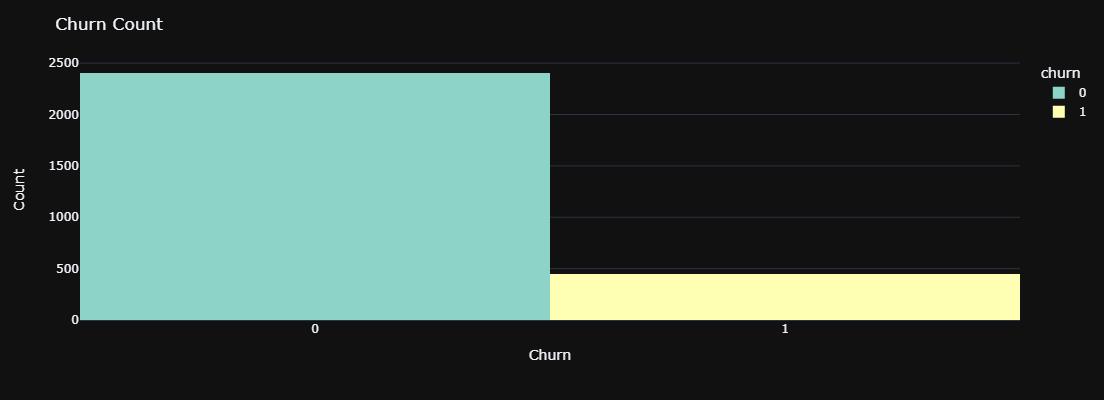

In [35]:
# Create the count plot
fig = px.histogram(churn_data['churn'], x="churn", color="churn", category_orders={"churn": [0, 1]}, color_discrete_sequence=px.colors.qualitative.Set3)

# Update layout for styling
fig.update_layout(
    title="Churn Count",
    xaxis_title="Churn",
    yaxis_title="Count",
    xaxis=dict(tickmode='array', tickvals=[0, 1], range=[-0.5, 1.5]),
    template="plotly_dark",
    width=400,
    height=400
)

# Show the plot
fig.show()

The dataset is highly imbalanced with respect to the target variable 'Churn'. It contains 2404 instances of non-churned customers (labeled as 0) and 446 instances of churned customers (labeled as 1). This imbalance poses a challenge for accurate model training and necessitates the use of techniques such as SMOTE to address the class disparity.

### Univariate Analysis

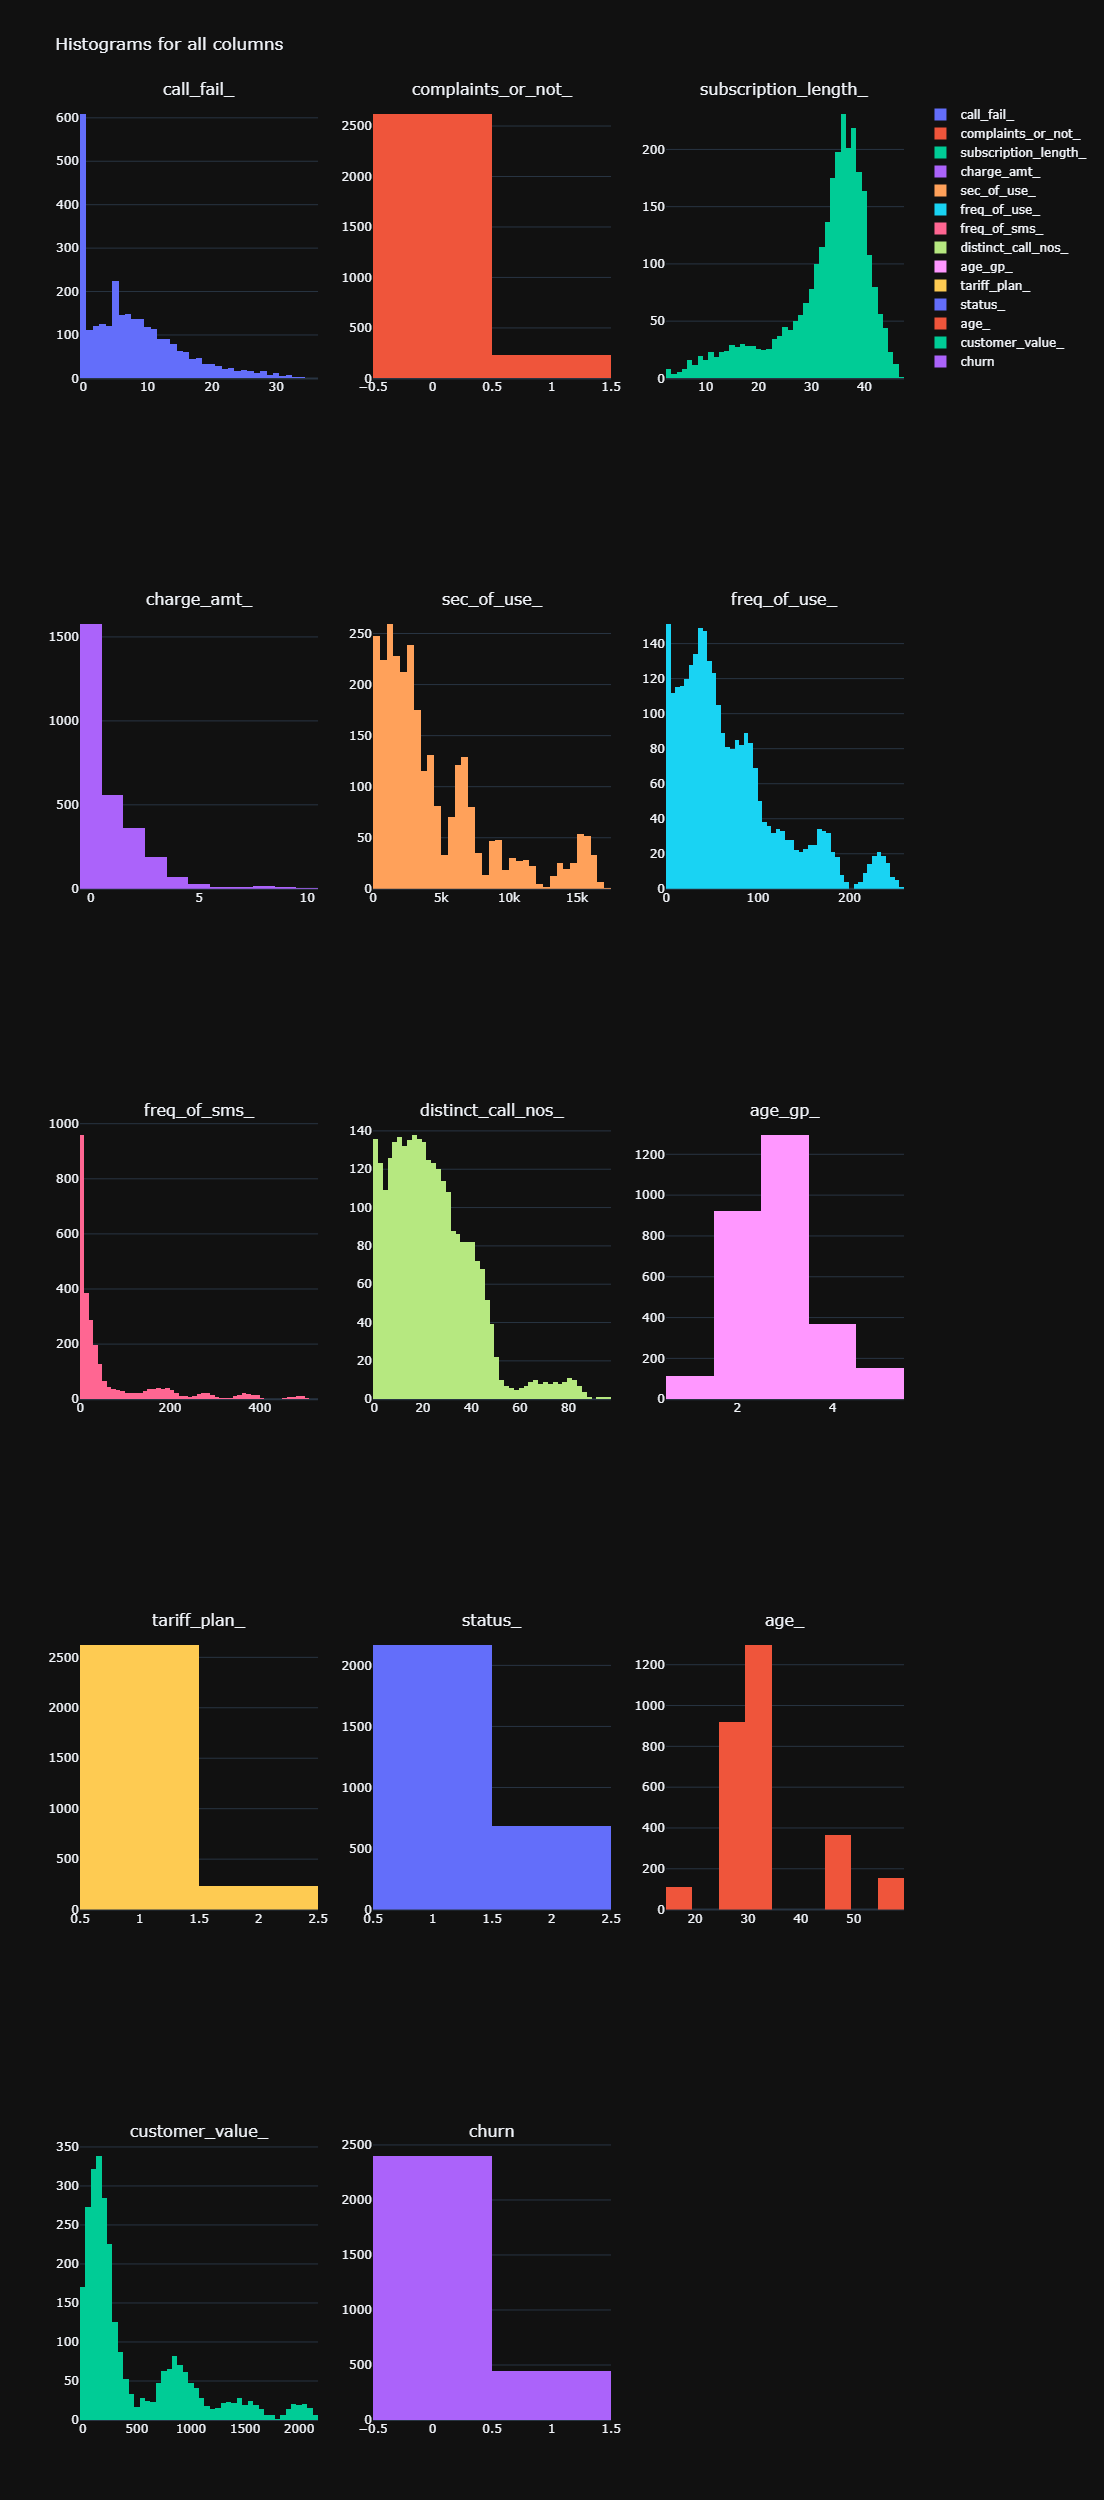

In [36]:
# Frequency distribution of all the columns
# Determine the number of rows and columns for the subplots
num_columns = 3
num_rows = (len(churn_data.columns) + 1) // num_columns

# Create a subplot grid
fig = make_subplots(rows=num_rows, cols=num_columns, subplot_titles=churn_data.columns)

# Add a histogram for each column
for i, column in enumerate(churn_data.columns):
    row = i // num_columns + 1
    col = i % num_columns + 1
    fig.add_trace(go.Histogram(x=churn_data[column], name=column), row=row, col=col)

# Update layout
fig.update_layout(
    title_text='Histograms for all columns',
    height=500 * num_rows,
    width=1000,
    template="plotly_dark"
)

# Show the plot
fig.show()

Univariate analysis involves examining each feature individually to understand its distribution, central tendency, and dispersion. This analysis is crucial for identifying potential issues such as skewness, outliers, and other anomalies in the data.

During the univariate analysis of our dataset, we observed that many features exhibit right skewness, and subscription length with left skewness, indicating that the distribution of these features has a long tail on the right side and left side respectively. This skewness is primarily due to the presence of outliers—data points that deviate significantly from the majority of the data.

To address the skewness and ensure our model performs optimally, we can retain the outliers but addressing their impact through scaling to prevent them from disproportionately affecting the model.

### Bivariate Analysis

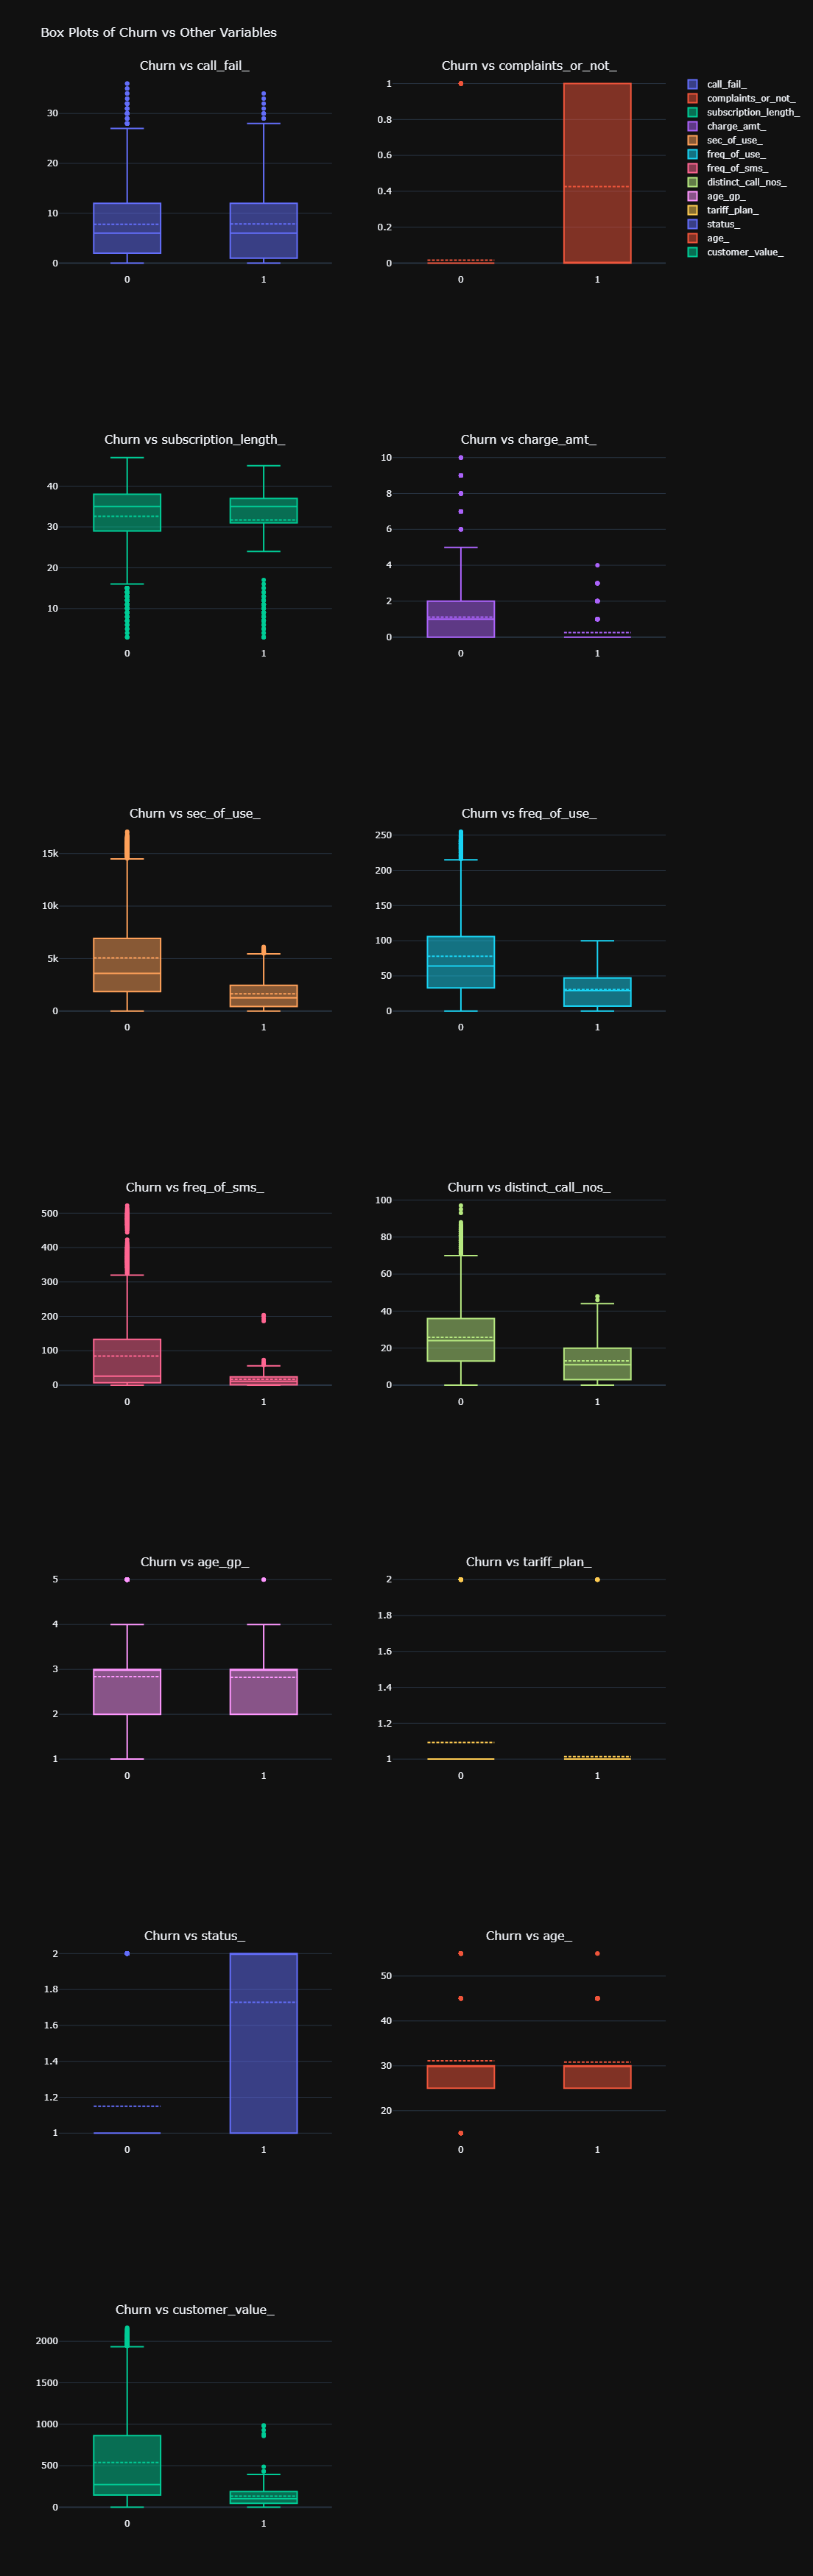

In [37]:
# Comparing all the columns with the target variable 'Churn'
# Determine the number of rows and columns for the subplots
num_columns = 2
num_rows = (len(churn_data.columns) - 1 + 1) // num_columns

# Create a subplot grid
fig = make_subplots(rows=num_rows, cols=num_columns, subplot_titles=[f"Churn vs {col}" for col in churn_data.columns if col != 'churn'])

# Add a box plot for each column against Churn
for i, column in enumerate(churn_data.columns):
    if column == 'churn':
        continue
    row = i // num_columns + 1
    col = i % num_columns + 1
    fig.add_trace(
        go.Box(y=churn_data[column], x=churn_data['churn'], name=column, boxmean=True),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    title_text='Box Plots of Churn vs Other Variables',
    height=500 * num_rows,
    width=1000,
    template="plotly_dark"
)

# Show the plot
fig.show()

Bivariate analysis involves examining the relationship between each feature and the target variable, in this case, churn. This analysis helps us understand how different features influence the likelihood of customer churn. Box plots were utilized to visualize these relationships, providing insights into the distribution of features for churned and non-churned customers.

Outliers are present in several features, as indicated by the extended whiskers and individual points beyond the whiskers in the box plots. These outliers can represent extreme usage patterns or anomalies in customer behavior.

The observed relationships indicate that certain features, such as Call Failure, Subscription Length, Charge Amount, Seconds of Use, and Frequency of Use, Complaints, Status, Tariff plan  are potentially strong predictors of churn. These features show clear differences between churned and non-churned groups, which can enhance the predictive power of the model.

### Multivariate Analysis

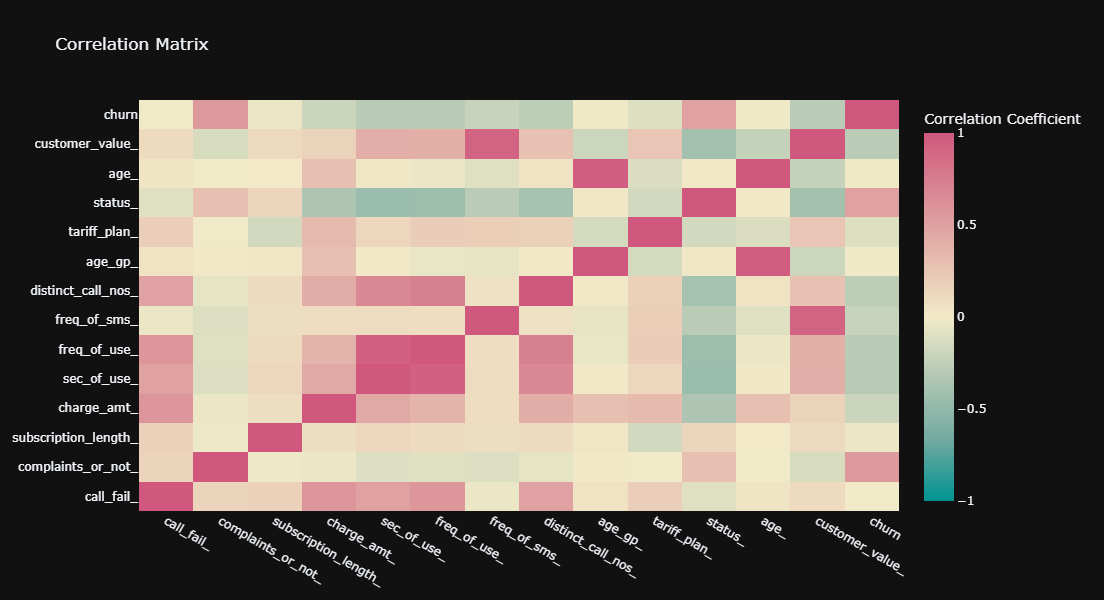

In [38]:
# Calculate correlation
churn_data_corr = churn_data.corr()

# Create heatmap using plotly
fig = go.Figure(data=go.Heatmap(
                   z=churn_data_corr.values,
                   x=churn_data_corr.columns,
                   y=churn_data_corr.index,
                   colorscale=px.colors.diverging.Tealrose,
                   zmin=-1, zmax=1,
                   hoverongaps=False,
                   colorbar=dict(title="Correlation Coefficient")
                  ))

# Update layout
fig.update_layout(
    title='Correlation Matrix',
    xaxis_nticks=36,
    height=600,
    width=800,
    template="plotly_dark"
)

# Show the plot
fig.show()

Multivariate analysis involves examining the relationships between multiple features simultaneously to understand how they interact and influence the target variable. This analysis is crucial for feature selection and engineering, ensuring that the model captures the most relevant information.

A correlation matrix is a table that shows the correlation coefficients between pairs of features. The correlation coefficient values range from -1 to 1, indicating the strength and direction of the relationship:

+1: Perfect positive correlation

-1: Perfect negative correlation

0: No correlation

A heat map is a visual representation of the correlation matrix, where colors represent the magnitude of the correlation coefficients. This visualization helps quickly identify strong correlations and patterns among features.


Based on the correlation analysis, we decided to drop the "Age" and "Frequency of SMS" features from the dataset. This decision helps in reducing multicollinearity, simplifying the model, and potentially improving its performance. By retaining the most relevant features, we ensure that the model remains robust, interpretable, and effective in predicting customer churn.

Even though "Seconds of Use" and "Frequency of Use" are highly correlated, retaining both aligns with our goal of building a comprehensive churn prediction model. Their combined inclusion allows us to capture nuanced aspects of customer behavior that are crucial for understanding and predicting churn in our telecom industry.

In [39]:
churn_data = churn_data.drop(['age_', 'freq_of_sms_'], axis = 1 )

In [40]:
churn_data.shape

(2850, 12)

Our dataset consists of 2850 data points. During initial analysis, we identified the presence of outliers. Given the relatively small size of the dataset, we made a strategic decision to retain these outliers.

Outliers often carry valuable information about extreme variations and edge cases in the data. Removing them without careful consideration might result in the loss of important insights, which could be crucial for the performance and robustness of our model.

In small datasets like ours, every data point counts. Eliminating outliers can significantly reduce the dataset size, leading to potential bias and overfitting issues. Retaining outliers ensures that we leverage the full scope of available data, capturing the inherent variability of the dataset.

To address the influence of outliers without removing them, we utilize scaling techniques. Scaling methods such as StandardScaler normalize the data, adjusting the values to a common range (-3 to 3). This process ensures that outliers do not disproportionately impact the model training, as all features are brought to a similar scale.

Hence, retaining outliers in a small dataset and addressing them through scaling is a balanced approach that preserves data integrity and ensures robust model performance. This strategy allows us to leverage the full dataset, capturing all variations and insights without letting extreme values skew the results.

### Sampling

#### 1. Random sampling

In [41]:
#split the data
X = churn_data.iloc[:,:11]
#store the output variable in y
y = churn_data.iloc[:,11]

In [42]:
X.shape, y.shape

((2850, 11), (2850,))

For the initial setup of our modeling process, we utilized random sampling with a train-test split:

Methodology: We randomly divided the dataset into training (80%) and testing (20%) sets using train_test_split from scikit-learn.

Purpose: This approach allows us to train the model on a large portion of the data while preserving a separate portion for evaluating its performance on unseen data. Random sampling ensures that both training and testing sets maintain a similar distribution of the target variable.

In [43]:
# Scaling data t0 -3 to 3
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# split data to X train/test and Y train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)


In [44]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2280, 11), (570, 11), (2280,), (570,))

#### 2. SMOTE

Given the imbalance in our target variable, we applied SMOTE to address this issue:

Methodology: SMOTE is a technique that synthesizes new minority class instances (churned customers) to create a more balanced dataset.

Purpose: By oversampling the minority class, SMOTE helps mitigate the bias towards the majority class during model training. This improves the model's ability to recognize patterns and make accurate predictions for the minority class.

In [45]:
sm = SMOTE(random_state=42, sampling_strategy = 1.0)
X_smote, y_smote  = sm.fit_resample(X, y)
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(X_smote, y_smote, test_size=0.20, random_state=42, stratify = y_smote)

In [46]:
X_smote_train.shape, X_smote_test.shape, Y_smote_train.shape, Y_smote_test.shape

((3846, 11), (962, 11), (3846,), (962,))

In [47]:
# Checking if the data is balanced or not
counter = Counter(y_smote)
print(counter)

Counter({0: 2404, 1: 2404})


In [48]:
#scale smote data
scaler = StandardScaler()
scaler.fit(X_smote)
X_scaled_smote = scaler.transform(X_smote)

In [49]:
# split data to X train/test and Y train/test
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(X_scaled_smote, y_smote, test_size=0.20, random_state=42, stratify = y_smote)

In [50]:
X_smote_train.shape, X_smote_test.shape, Y_smote_train.shape, Y_smote_test.shape

((3846, 11), (962, 11), (3846,), (962,))

## Model Selection

### 1. Logistic Regression

In [51]:
# Model training with scaled input data
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)

# Model prediction
y_pred = log_model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nROC-AUC Score:\n", roc_auc_score(Y_test, y_pred))

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       481
           1       0.81      0.47      0.60        89

    accuracy                           0.90       570
   macro avg       0.86      0.73      0.77       570
weighted avg       0.89      0.90      0.89       570


Confusion Matrix:
 [[471  10]
 [ 47  42]]

ROC-AUC Score:
 0.725560045784765


***Model Performance Metrics: Our logistic regression model achieved an accuracy of 90%, precision of 0.89, recall of 0.90, f1-score 0.89 and an ROC-AUC score of 0.725560045784765.***

In [52]:
# Model training with scaled smote input data
log_smote_model = LogisticRegression()
log_smote_model.fit(X_smote_train, Y_smote_train)

# Model prediction
y_smote_pred = log_smote_model.predict(X_smote_test)

# Model evaluation
print("Accuracy:", accuracy_score(Y_smote_test, y_smote_pred))
print("\nClassification Report:\n", classification_report(Y_smote_test, y_smote_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_smote_test, y_smote_pred))
print("\nROC-AUC Score:\n", roc_auc_score(Y_smote_test, y_smote_pred))

Accuracy: 0.8378378378378378

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       481
           1       0.84      0.84      0.84       481

    accuracy                           0.84       962
   macro avg       0.84      0.84      0.84       962
weighted avg       0.84      0.84      0.84       962


Confusion Matrix:
 [[401  80]
 [ 76 405]]

ROC-AUC Score:
 0.8378378378378378


***Model Performance Metrics: Our logistic regression model using SMOTE achieved an accuracy of 83.78%, precision of 0.84, recall of 0.84, f1-score 0.84 and an ROC-AUC score of 0.8378378378378378.***

### 2. K Nearest Neighbours (KNN)

In [53]:
# Model training with scaled input data
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)

# Model prediction
y_pred = knn.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nROC-AUC Score:\n", roc_auc_score(Y_test, y_pred))

Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       481
           1       0.83      0.83      0.83        89

    accuracy                           0.95       570
   macro avg       0.90      0.90      0.90       570
weighted avg       0.95      0.95      0.95       570


Confusion Matrix:
 [[466  15]
 [ 15  74]]

ROC-AUC Score:
 0.9001378214861361


***Model Performance Metrics: Our K Nearest Neighbours model achieved an accuracy of 94.73%, precision of 0.95, recall of 0.95, f1-score 0.95 and an ROC-AUC score of 0.9001378214861361.***

In [54]:
# Model training with scaled smote input data
k = 5  # Number of neighbors
knn_smote = KNeighborsClassifier(n_neighbors=k)
knn_smote.fit(X_smote_train, Y_smote_train)

# Model prediction
y_smote_pred = knn_smote.predict(X_smote_test)

# Model evaluation
print("Accuracy:", accuracy_score(Y_smote_test, y_smote_pred))
print("\nClassification Report:\n", classification_report(Y_smote_test, y_smote_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_smote_test, y_smote_pred))
print("\nROC-AUC Score:\n", roc_auc_score(Y_smote_test, y_smote_pred))

Accuracy: 0.9542619542619543

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       481
           1       0.93      0.98      0.96       481

    accuracy                           0.95       962
   macro avg       0.96      0.95      0.95       962
weighted avg       0.96      0.95      0.95       962


Confusion Matrix:
 [[445  36]
 [  8 473]]

ROC-AUC Score:
 0.9542619542619543


***Model Performance Metrics: Our K Nearest Neighbours model using SMOTE data achieved an accuracy of 95.42%, precision of 0.96, recall of 0.95, f1-score 0.95 and an ROC-AUC score of 0.9542619542619543.***

### 3. Random Forest Classifier

In [55]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search cross-validation
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Model training with scaled input data
grid_search_rf.fit(X_train, Y_train)

# Get the best estimator and its hyperparameters
best_rf_classifier = grid_search_rf.best_estimator_
best_params_rf_classifier = grid_search_rf.best_params_

print("Best Parameters:", best_params_rf_classifier)

# Model Prediction using the best estimator
y_pred = best_rf_classifier.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nROC-AUC Score:\n", roc_auc_score(Y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.9596491228070175

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       481
           1       0.93      0.80      0.86        89

    accuracy                           0.96       570
   macro avg       0.95      0.89      0.92       570
weighted avg       0.96      0.96      0.96       570


Confusion Matrix:
 [[476   5]
 [ 18  71]]

ROC-AUC Score:
 0.8936788992968768


***Model Performance Metrics: Our Random Forest Classifier achieved an accuracy of 95.96%, precision of 0.96, recall of 0.96, f1-score 0.96 and an ROC-AUC score of 0.8936788992968768.***

In [29]:
# Model training with scaled smote input data
grid_search_rf.fit(X_smote_train, Y_smote_train)

# Get the best estimator and its hyperparameters
best_rf_smote_classifier = grid_search_rf.best_estimator_
best_params_rf_smote_classifier = grid_search_rf.best_params_

print("Best Parameters:", best_params_rf_smote_classifier)

# Model Prediction using the best estimator
y_smote_pred = best_rf_smote_classifier.predict(X_smote_test)

# Model evaluation
print("Accuracy:", accuracy_score(Y_smote_test, y_smote_pred))
print("\nClassification Report:\n", classification_report(Y_smote_test, y_smote_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_smote_test, y_smote_pred))
print("\nROC-AUC Score:\n", roc_auc_score(Y_smote_test, y_smote_pred))

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.974012474012474

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       481
           1       0.97      0.98      0.97       481

    accuracy                           0.97       962
   macro avg       0.97      0.97      0.97       962
weighted avg       0.97      0.97      0.97       962


Confusion Matrix:
 [[464  17]
 [  8 473]]

ROC-AUC Score:
 0.9740124740124741


***Model Performance Metrics: Our Random Forest Classifier using SMOTE data achieved an accuracy of 97.40%, precision of 0.97, recall of 0.97, f1-score 0.97 and an ROC-AUC score of 0.9740124740124741.***

### 4. Gradient Boosting Decision Tree - Classifier

In [30]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Perform grid search cross-validation
grid_search_gb = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, Y_train)

# Get the best estimator and its hyperparameters
best_gb_classifier = grid_search_gb.best_estimator_
best_params_gb_classifier = grid_search_gb.best_params_

print("Best Parameters:", best_params_gb_classifier)

# Model prediction using the best estimator
y_pred = best_gb_classifier.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nROC-AUC Score:\n", roc_auc_score(Y_test, y_pred))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.9701754385964912

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       481
           1       0.93      0.88      0.90        89

    accuracy                           0.97       570
   macro avg       0.95      0.93      0.94       570
weighted avg       0.97      0.97      0.97       570


Confusion Matrix:
 [[475   6]
 [ 11  78]]

ROC-AUC Score:
 0.9319652409540049


***Model Performance Metrics: Our Gradient Boosting Decision Tree - Classifier achieved an accuracy of 97.01%, precision of 0.97, recall of 0.97, f1-score 0.97 and an ROC-AUC score of 0.9319652409540049.***

In [31]:
# Model training with scaled smote input data
grid_search_gb.fit(X_smote_train, Y_smote_train)

# Get the best estimator and its hyperparameters
best_gb_smote_classifier = grid_search_gb.best_estimator_
best_params_gb_smote_classifier = grid_search_gb.best_params_

print("Best Parameters:", best_params_gb_smote_classifier)

# Model Prediction using the best estimator
y_smote_pred = best_gb_smote_classifier.predict(X_smote_test)

# Model evaluation
print("Accuracy:", accuracy_score(Y_smote_test, y_smote_pred))
print("\nClassification Report:\n", classification_report(Y_smote_test, y_smote_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_smote_test, y_smote_pred))
print("\nROC-AUC Score:\n", roc_auc_score(Y_smote_test, y_smote_pred))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.9792099792099792

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       481
           1       0.97      0.99      0.98       481

    accuracy                           0.98       962
   macro avg       0.98      0.98      0.98       962
weighted avg       0.98      0.98      0.98       962


Confusion Matrix:
 [[468  13]
 [  7 474]]

ROC-AUC Score:
 0.9792099792099792


***Model Performance Metrics: Our Gradient Boosting Decision Tree - Classifier using SMOTE data achieved an accuracy of 97.92%, precision of 0.98, recall of 0.98, f1-score 0.98 and an ROC-AUC score of 0.9792099792099792
.***

### 5. XGBoost Classifier

In [32]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform grid search cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, Y_train)

# Get the best estimator and its hyperparameters
best_xgb_classifier = grid_search_xgb.best_estimator_
best_params_xgb_classifier = grid_search_xgb.best_params_

print("Best Parameters:", best_params_xgb_classifier)

# Model prediction using the best estimator
y_pred = best_xgb_classifier.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nROC-AUC Score:\n", roc_auc_score(Y_test, y_pred))

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.9526315789473684

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       481
           1       0.87      0.82      0.84        89

    accuracy                           0.95       570
   macro avg       0.92      0.90      0.91       570
weighted avg       0.95      0.95      0.95       570


Confusion Matrix:
 [[470  11]
 [ 16  73]]

ROC-AUC Score:
 0.8986778481160503


***Model Performance Metrics: Our XGBoost Classifier achieved an accuracy of 95.26%, precision of 0.95, recall of 0.95, f1-score 0.95 and an ROC-AUC score of 0.8986778481160503.***

In [33]:
# Model training with scaled smote input data
grid_search_xgb.fit(X_smote_train, Y_smote_train)

# Get the best estimator and its hyperparameters
best_xgb_smote_classifier = grid_search_xgb.best_estimator_
best_params_xgb_smote_classifier = grid_search_xgb.best_params_

print("Best Parameters:", best_params_xgb_smote_classifier)

# Model Prediction using the best estimator
y_smote_pred = best_xgb_smote_classifier.predict(X_smote_test)

# Model evaluation
print("Accuracy:", accuracy_score(Y_smote_test, y_smote_pred))
print("\nClassification Report:\n", classification_report(Y_smote_test, y_smote_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_smote_test, y_smote_pred))
print("\nROC-AUC Score:\n", roc_auc_score(Y_smote_test, y_smote_pred))

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Accuracy: 0.974012474012474

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       481
           1       0.97      0.98      0.97       481

    accuracy                           0.97       962
   macro avg       0.97      0.97      0.97       962
weighted avg       0.97      0.97      0.97       962


Confusion Matrix:
 [[465  16]
 [  9 472]]

ROC-AUC Score:
 0.974012474012474


***Model Performance Metrics: Our XGBoost Classifier using SMOTE data achieved an accuracy of 97.40%, precision of 0.97, recall of 0.97, f1-score 0.97 and an ROC-AUC score of 0.974012474012474.***

## Model Analysis

In [38]:
# List of best models from grid search CV
best_models = {
    "Logistic Regression": log_model,
    "K-Nearest Neighbors": knn,
    "Random Forest": best_rf_classifier,
    "Gradient Boosting DT": best_gb_classifier,
    "XGBoost": best_xgb_classifier
}

# Prepare a results dictionary
results = {
    "Model": [],
    "Accuracy": [],
    "ROC-AUC": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Evaluate each best model
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_pred) 
    report = classification_report(Y_test, y_pred, output_dict=True)
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["ROC-AUC"].append(roc_auc)
    results["Precision"].append(report["weighted avg"]["precision"])
    results["Recall"].append(report["weighted avg"]["recall"])
    results["F1-Score"].append(report["weighted avg"]["f1-score"])

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results)

# Print the results table
print(results_df)


                  Model  Accuracy   ROC-AUC  Precision    Recall  F1-Score
0   Logistic Regression  0.900000  0.725560   0.893407  0.900000  0.888731
1   K-Nearest Neighbors  0.947368  0.900138   0.947368  0.947368  0.947368
2         Random Forest  0.959649  0.893679   0.958980  0.959649  0.958329
3  Gradient Boosting DT  0.970175  0.931965   0.969747  0.970175  0.969822
4               XGBoost  0.952632  0.898678   0.951772  0.952632  0.952070


In [37]:
# List of best models from grid search CV
best_models = {
    "Logistic Regression": log_smote_model,
    "K-Nearest Neighbors": knn_smote,
    "Random Forest": best_rf_smote_classifier,
    "Gradient Boosting DT": best_gb_smote_classifier,
    "XGBoost": best_xgb_smote_classifier
}

# Prepare a results dictionary
results = {
    "Smote data Model": [],
    "Accuracy": [],
    "ROC-AUC": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Evaluate each best model
for name, model in best_models.items():
    y_smote_pred = model.predict(X_smote_test)
    
    accuracy = accuracy_score(Y_smote_test, y_smote_pred)
    roc_auc = roc_auc_score(Y_smote_test, y_smote_pred) 
    report = classification_report(Y_smote_test, y_smote_pred, output_dict=True)
    results["Smote data Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["ROC-AUC"].append(roc_auc)
    results["Precision"].append(report["weighted avg"]["precision"])
    results["Recall"].append(report["weighted avg"]["recall"])
    results["F1-Score"].append(report["weighted avg"]["f1-score"])

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results)

# Print the results table
print(results_df)


       Smote data Model  Accuracy   ROC-AUC  Precision    Recall  F1-Score
0   Logistic Regression  0.837838  0.837838   0.837861  0.837838  0.837835
1   K-Nearest Neighbors  0.954262  0.954262   0.955807  0.954262  0.954223
2         Random Forest  0.974012  0.974012   0.974178  0.974012  0.974010
3  Gradient Boosting DT  0.979210  0.979210   0.979285  0.979210  0.979209
4               XGBoost  0.974012  0.974012   0.974113  0.974012  0.974011


## Conclusion and Recommendations

Among all the classifier models tested, the Gradient Boosting Decision Tree model performed exceptionally well in predicting customer churn. 

For the scaled input data, the model achieved an accuracy of 0.97, an ROC-AUC of 0.93, and an F1-score of 0.96, indicating high precision and recall. When applied to the SMOTE data, which addresses class imbalance by oversampling the minority class, the model maintained an accuracy of 0.97, with an improved ROC-AUC of 0.97 and an F1-score of 0.97. These metrics reflect the model's robustness and effectiveness in both balanced and imbalanced datasets, making it a reliable choice for predicting customer churn.

**Recommendations to Avoid Customer Churn**

Predictive Analytics for Proactive Measures: Use predictive analytics to identify early signs of churn and implement targeted retention strategies.

Enhance Customer Engagement: Implement personalized communication and exclusive promotions for high-value customers.

Improve Service Quality: Monitor and reduce call failures and address complaints promptly with exceptional customer support.

Analyze and Act on Feedback: Regularly collect and analyze feedback to identify and address common pain points.

Flexible and Competitive Tariff Plans: Offer a range of flexible plans and regularly adjust pricing to remain competitive.

Customer Value Enhancement: Provide additional benefits and educate customers on maximizing the value of their plans.

Data-Driven Decision Making: Leverage data analytics to continuously refine customer engagement and retention efforts.
By implementing these recommendations, telecom companies can reduce customer churn, enhance customer satisfaction, and maintain a competitive edge.
